In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
from statsmodels.formula.api import ols      # For n-way ANOVA
from statsmodels.stats.anova import _get_covariance,anova_lm
import matplotlib.pyplot as plt  # library for visualization
%matplotlib inline
import scipy.stats as stats

Problem 1
A physiotherapist with a male football team is interested in studying the relationship between foot injuries and the positions at which the players play from the data collected.

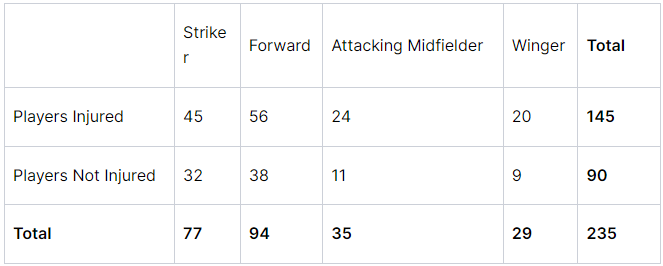

Based on the above data, answer the following questions.

1.1 What is the probability that a randomly chosen player would suffer an injury?

1.2 What is the probability that a player is a forward or a winger?

1.3 What is the probability that a randomly chosen player plays in a striker position and has a foot injury?

1.4 What is the probability that a randomly chosen injured player is a striker?

In [15]:
import pandas as pd

# Load the dataset
data = {
    'Position': ['Striker', 'Forward', 'Attacking Midfielder', 'Winger','Total'],
    'Players Injured': [45, 56, 24, 20, 145],
    'Players Not Injured': [32, 38, 11, 9, 90],
    'Total':[77,94,35,29,235]
}

# Create a DataFrame
df = pd.DataFrame(data)
print(df.head())


               Position  Players Injured  Players Not Injured  Total
0               Striker               45                   32     77
1               Forward               56                   38     94
2  Attacking Midfielder               24                   11     35
3                Winger               20                    9     29
4                 Total              145                   90    235


In [16]:
print(df.dtypes)

Position               object
Players Injured         int64
Players Not Injured     int64
Total                   int64
dtype: object


In [9]:
null_count_position = df['Position'].isnull().sum()

# Calculate unique values for 'Position'
unique_count_position = df['Position'].nunique()

print(f"Null Value Count for 'Position': {null_count_position}")
print(f"Unique Value Count for 'Position': {unique_count_position}")

Null Value Count for 'Position': 0
Unique Value Count for 'Position': 5


In [10]:
unique_values_position = df['Position'].unique()

print(f"Unique Values in 'Position': {list(unique_values_position)}")

Unique Values in 'Position': ['Striker', 'Forward', 'Attacking Midfielder', 'Winger', 'Total']


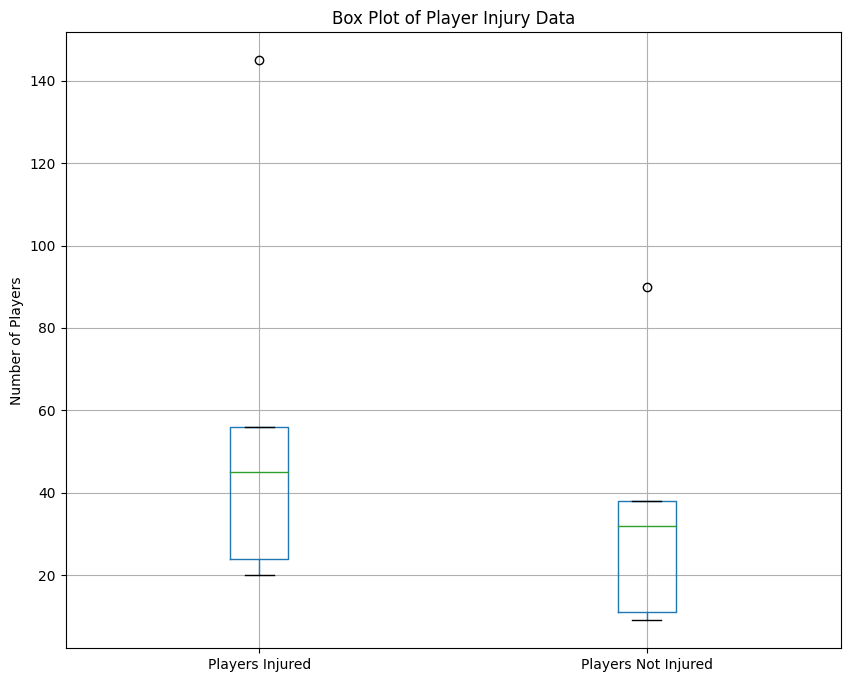

In [19]:
numeric_columns = ['Players Injured', 'Players Not Injured']

# Create the boxplot
plt.figure(figsize=(10, 8))
df.boxplot(column=numeric_columns)
plt.title('Box Plot of Player Injury Data')
plt.ylabel('Number of Players')
plt.show()

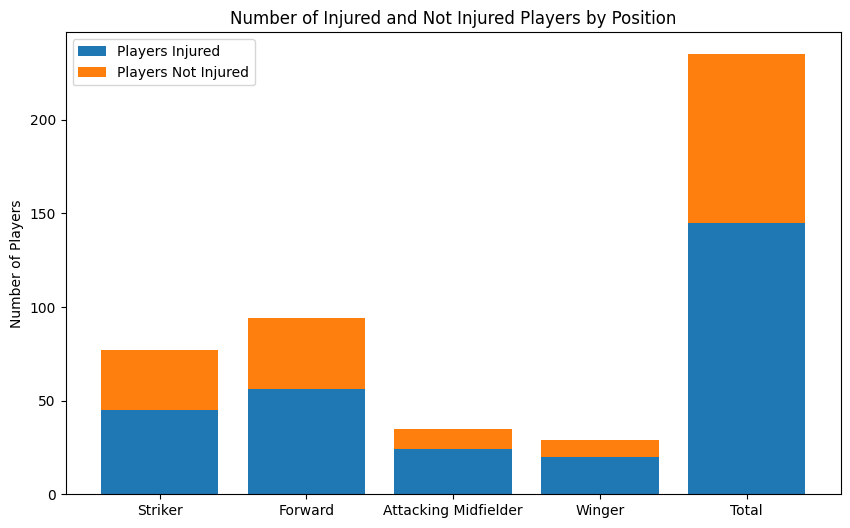

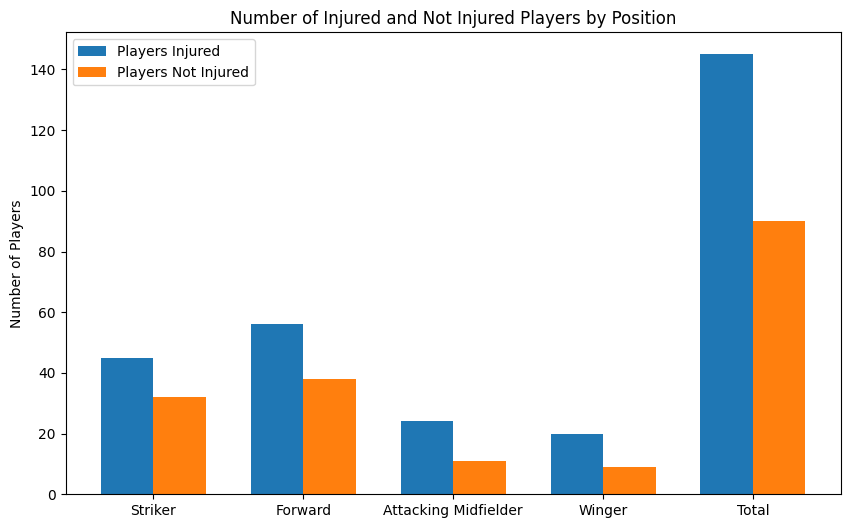

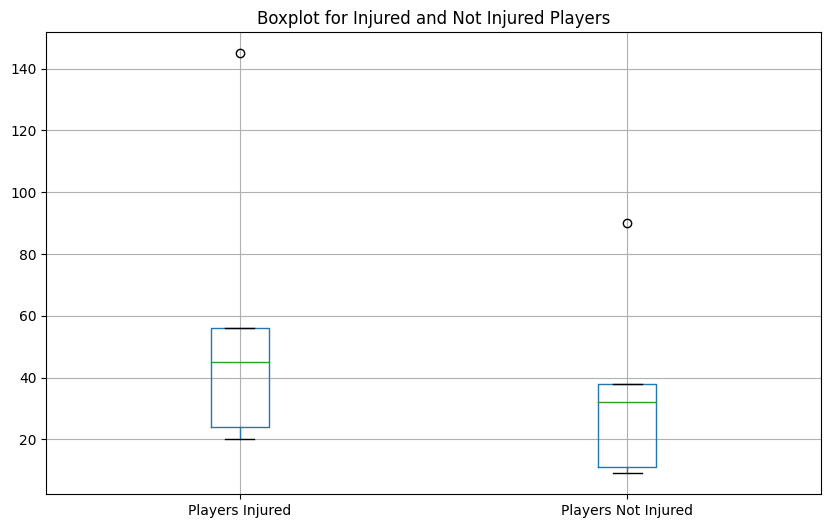

In [20]:
df = pd.DataFrame(data)
positions = df['Position']
injured = df['Players Injured']
not_injured = df['Players Not Injured']

# Create the stacked bar plot
plt.figure(figsize=(10, 6))
p1 = plt.bar(positions, injured, label='Players Injured')
p2 = plt.bar(positions, not_injured, bottom=injured, label='Players Not Injured')
plt.ylabel('Number of Players')
plt.title('Number of Injured and Not Injured Players by Position')
plt.legend()
plt.show()

# Create the grouped bar plot
ind = np.arange(len(df))  # the x locations for the groups
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(ind - width/2, injured, width, label='Players Injured')
rects2 = ax.bar(ind + width/2, not_injured, width, label='Players Not Injured')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_ylabel('Number of Players')
ax.set_title('Number of Injured and Not Injured Players by Position')
ax.set_xticks(ind)
ax.set_xticklabels(positions)
ax.legend()

plt.show()

# Create the box plot
df_box = df[['Players Injured', 'Players Not Injured']]
plt.figure(figsize=(10, 6))
df_box.boxplot()
plt.title('Boxplot for Injured and Not Injured Players')
plt.show()

**1.1 What is the probability that a randomly chosen player would suffer an injury?**

In [2]:
# Calculate total number of players
total_players = df.iloc[-1]['Players Injured'] + df.iloc[-1]['Players Not Injured']

# 1.1 Probability of Injury
probability_injury = df.iloc[-1]['Players Injured'] / total_players
print("1.1 Probability of a randomly chosen player suffering an injury:", probability_injury)

1.1 Probability of a randomly chosen player suffering an injury: 0.6170212765957447


**1.2 What is the probability that a player is a forward or a winger?**

In [ ]:
# 1.2 Probability of Position (Forward or Winger)
forward_winger_injury = df.iloc[1]['Players Injured'] + df.iloc[3]['Players Injured']
probability_forward_winger = forward_winger_injury / total_players
print("1.2 Probability of a player being a forward or a winger:", probability_forward_winger)


1.2 Probability of a player being a forward or a winger: 0.32340425531914896


**1.3 What is the probability that a randomly chosen player plays in a striker position and has a foot injury?**

In [ ]:
# 1.3 Probability of Position and Injury (Striker)
striker_injury = df.iloc[0]['Players Injured']
probability_striker_injury = striker_injury / total_players
print("1.3 Probability of a randomly chosen player playing in a striker position and having a foot injury:", probability_striker_injury)

1.3 Probability of a randomly chosen player playing in a striker position and having a foot injury: 0.19148936170212766


**1.4 What is the probability that a randomly chosen injured player is a striker?**

In [ ]:
# 1.4 Probability of Position given Injury (Striker)
probability_injury_given_striker = striker_injury / df.iloc[-1]['Players Injured']
print("1.4 Probability of a randomly chosen injured player being a striker:", probability_injury_given_striker)

1.4 Probability of a randomly chosen injured player being a striker: 0.3103448275862069


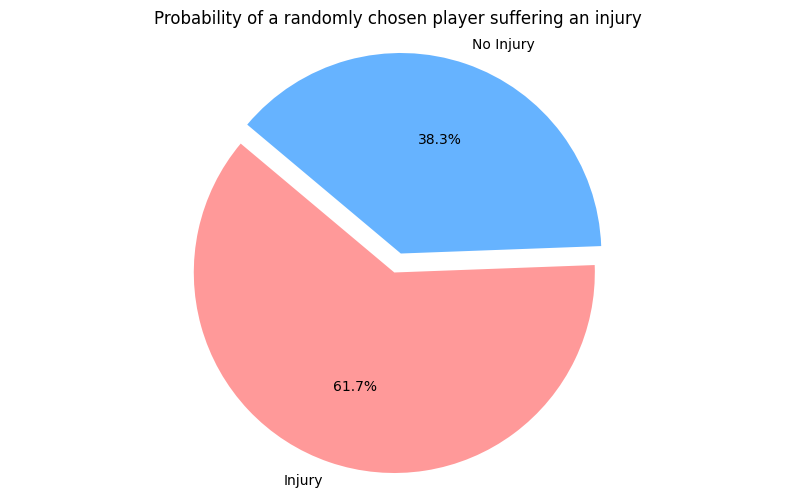

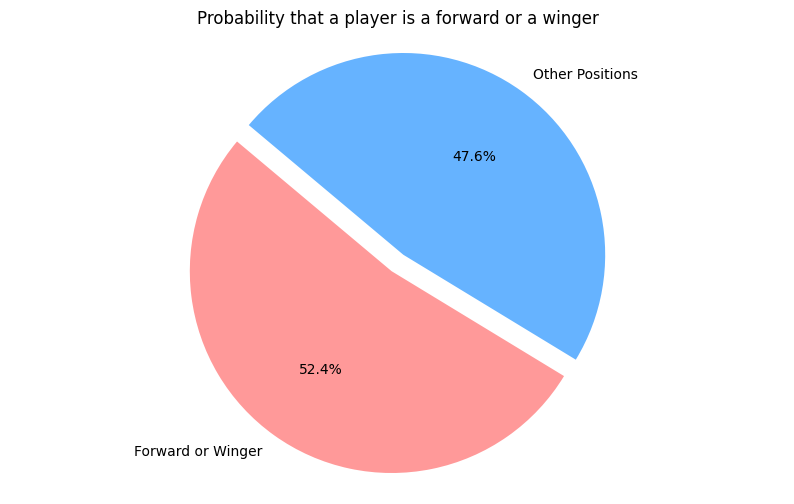

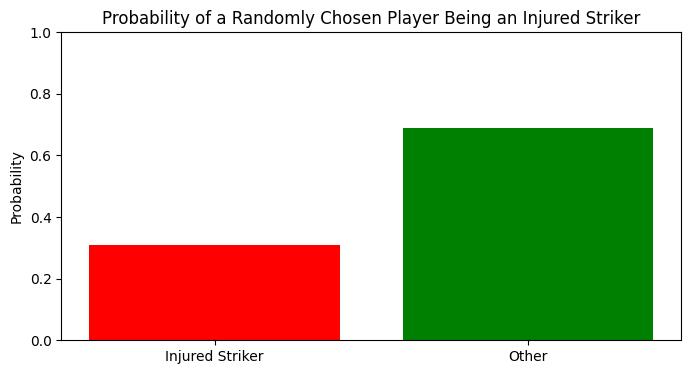

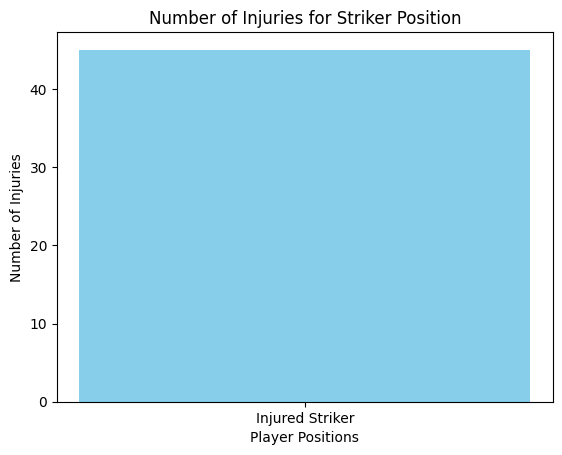

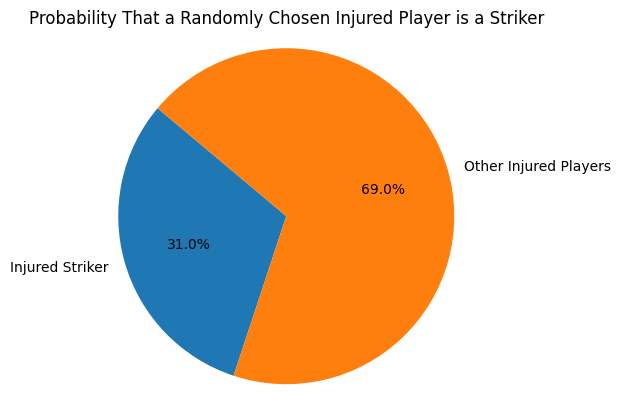

In [28]:
# Data
positions = ['Striker', 'Forward', 'Attacking Midfielder', 'Winger']
players_injured = [45, 56, 24, 20]
total_players = sum(players_injured)

# Calculate probabilities
prob_injury = total_players / sum(players_injured + [sum(players_injured), sum(players_injured)])
prob_forward_or_winger = (players_injured[1] + players_injured[3]) / total_players
prob_striker_and_injury = players_injured[0] / total_players
prob_injured_striker = players_injured[0] / total_players

# Visualization
labels = ['Injury', 'No Injury']
sizes = [total_players, 235 - total_players]
colors = ['#ff9999', '#66b3ff']
explode = (0.1, 0)

plt.figure(figsize=(10, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Probability of a randomly chosen player suffering an injury')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

# Visualization for probability that a player is a forward or a winger
labels = ['Forward or Winger', 'Other Positions']
sizes = [prob_forward_or_winger * 100, (1 - prob_forward_or_winger) * 100]
colors = ['#ff9999', '#66b3ff']
explode = (0.1, 0)

plt.figure(figsize=(10, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Probability that a player is a forward or a winger')
plt.axis('equal')
plt.show()

# Visualization for probability that a randomly chosen player plays in a striker position and has a foot injury
probability_injured_striker = injured_strikers / total_players

# Prepare data for plotting
categories = ['Injured Striker', 'Other']
probabilities = [probability_injured_striker, 1 - probability_injured_striker]

# Create the bar plot
plt.figure(figsize=(8, 4))
plt.bar(categories, probabilities, color=['red', 'green'])
plt.title('Probability of a Randomly Chosen Player Being an Injured Striker')
plt.ylabel('Probability')
plt.ylim(0, 1)  # Set y-axis to show probabilities from 0 to 1
plt.show()

# Visualization for probability that a randomly chosen injured player is a striker
plt.bar(['Injured Striker'], [players_injured[0]], color='skyblue')
plt.xlabel('Player Positions')
plt.ylabel('Number of Injuries')
plt.title('Number of Injuries for Striker Position')
plt.show()

# Calculate the probability that an injured player is a striker
injured_strikers = 45
total_injured_players = 145
probability_injured_striker = injured_strikers / total_injured_players

# Data for plotting
labels = ['Injured Striker', 'Other Injured Players']
sizes = [probability_injured_striker, 1 - probability_injured_striker]
colors = ['blue', 'orange']

# Plotting the pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular
plt.title('Probability That a Randomly Chosen Injured Player is a Striker')
plt.show()

For the analysis of foot injuries among different positions in the football team, you can create visualizations such as:

Bar plot showing the distribution of injuries across different positions.
Pie chart illustrating the proportion of injuries for each position.
Stacked bar plot comparing the number of injuries and non-injuries for each position.

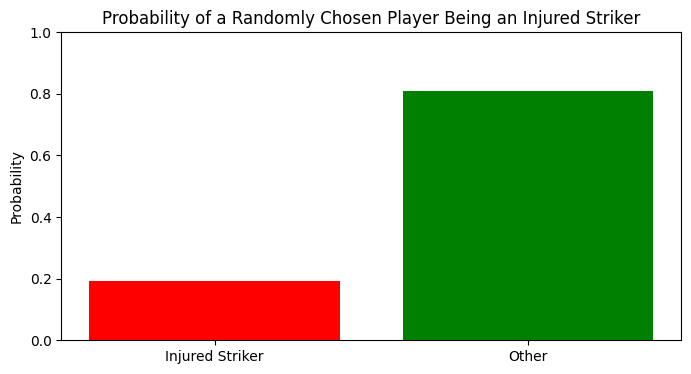

In [21]:
import matplotlib.pyplot as plt

# Given values
injured_strikers = 45
total_players = 235

# Calculate the probability
probability_injured_striker = injured_strikers / total_players

# Prepare data for plotting
categories = ['Injured Striker', 'Other']
probabilities = [probability_injured_striker, 1 - probability_injured_striker]

# Create the bar plot
plt.figure(figsize=(8, 4))
plt.bar(categories, probabilities, color=['red', 'green'])
plt.title('Probability of a Randomly Chosen Player Being an Injured Striker')
plt.ylabel('Probability')
plt.ylim(0, 1)  # Set y-axis to show probabilities from 0 to 1
plt.show()

Bar plot showing the distribution of injuries across different positions

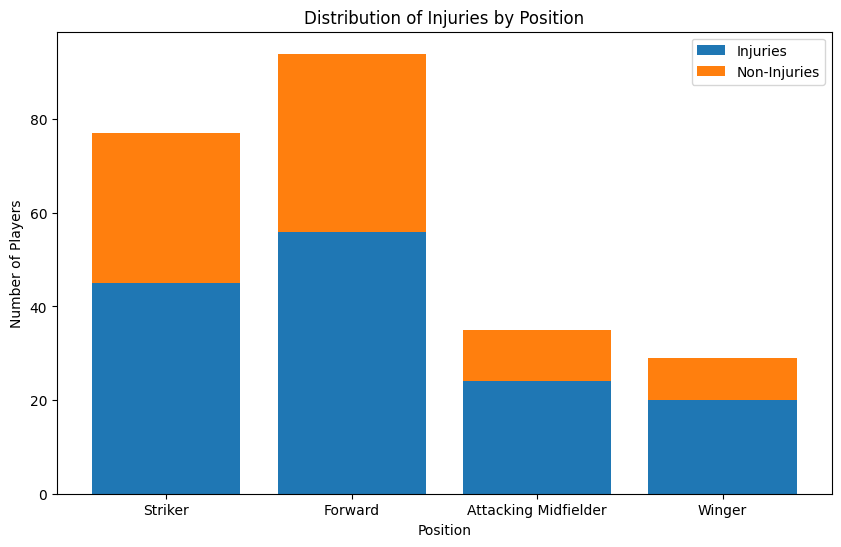

In [ ]:
positions = ['Striker', 'Forward', 'Attacking Midfielder', 'Winger']
injuries = [45, 56, 24, 20]
non_injuries = [32, 38, 11, 9]

# Bar plot
plt.figure(figsize=(10, 6))
plt.bar(positions, injuries, label='Injuries')
plt.bar(positions, non_injuries, bottom=injuries, label='Non-Injuries')
plt.xlabel('Position')
plt.ylabel('Number of Players')
plt.title('Distribution of Injuries by Position')
plt.legend()
plt.show()

Pie chart illustrating the proportion of injuries for each position

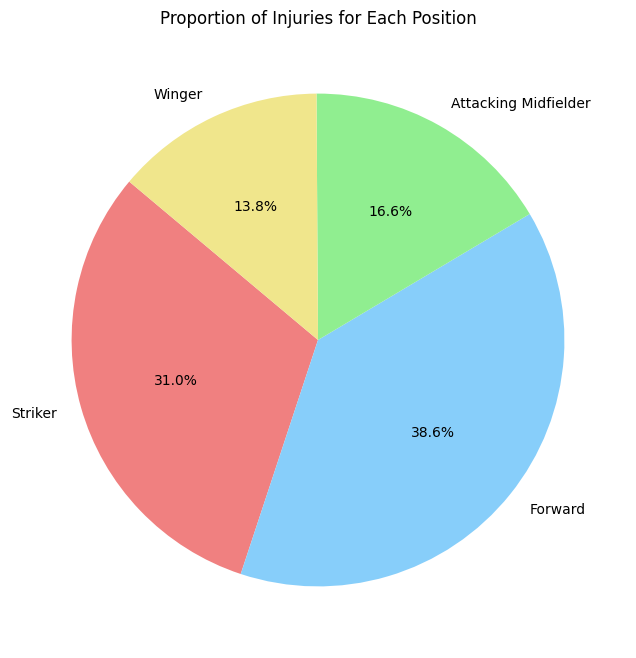

In [ ]:
# Pie chart illustrating the proportion of injuries for each position
plt.figure(figsize=(8, 8))
plt.pie(injuries, labels=positions, autopct='%1.1f%%', startangle=140, colors=['lightcoral', 'lightskyblue', 'lightgreen', 'khaki'])
plt.title('Proportion of Injuries for Each Position')
plt.show()

Problem 2
The breaking strength of gunny bags used for packaging cement is normally distributed with a mean of 5 kg per sq. centimeter and a standard deviation of 1.5 kg per sq. centimeter. The quality team of the cement company wants to know the following about the packaging material to better understand wastage or pilferage within the supply chain; Answer the questions below based on the given information; (Provide an appropriate visual representation of your answers, without which marks will be deducted)

2.1 What proportion of the gunny bags have a breaking strength of less than 3.17 kg per sq cm?

2.2 What proportion of the gunny bags have a breaking strength of at least 3.6 kg per sq cm.?

2.3 What proportion of the gunny bags have a breaking strength between 5 and 5.5 kg per sq cm.?

2.4 What proportion of the gunny bags have a breaking strength NOT between 3 and 7.5 kg per sq cm.?

In [ ]:
import scipy.stats as stats

# Given parameters
mean_strength = 5  # mean breaking strength in kg/sq cm
std_dev_strength = 1.5  # standard deviation of breaking strength in kg/sq cm

# Function to calculate proportion based on z-score
def calculate_proportion(mean, std_dev, value):
    z_score = (value - mean) / std_dev
    proportion = stats.norm.cdf(z_score)
    return proportion

**Univariate Analysis**

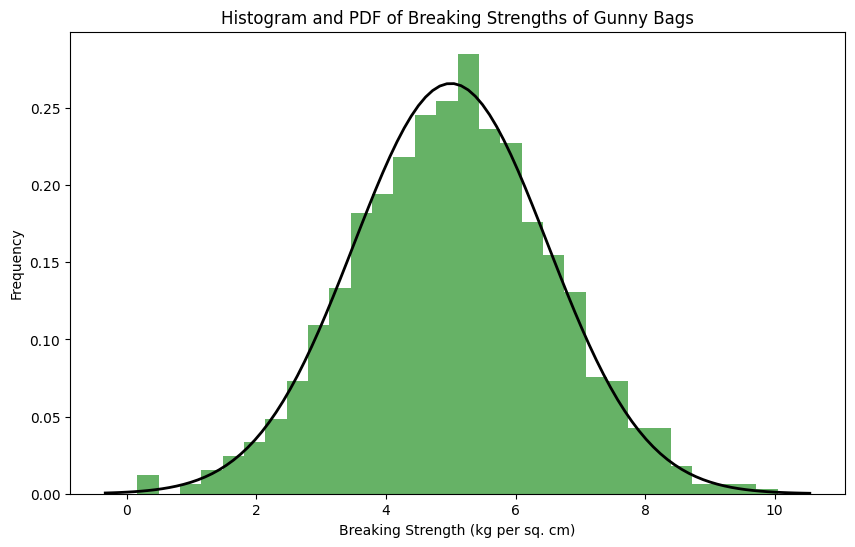

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Set the mean and standard deviation for the normal distribution
mean = 5  # mean breaking strength in kg per sq. cm
std_dev = 1.5  # standard deviation in kg per sq. cm

# Generate some data for the breaking strength of gunny bags
sample_strengths = np.random.normal(mean, std_dev, 1000)

# Plot the histogram of the breaking strengths
plt.figure(figsize=(10, 6))
count, bins, ignored = plt.hist(sample_strengths, bins=30, density=True, alpha=0.6, color='g')

# Plot the PDF of the normal distribution
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean, std_dev)
plt.plot(x, p, 'k', linewidth=2)
title_text = 'Histogram and PDF of Breaking Strengths of Gunny Bags'
plt.title(title_text)
plt.xlabel('Breaking Strength (kg per sq. cm)')
plt.ylabel('Frequency')
plt.show()

**Bivariate Analysis**

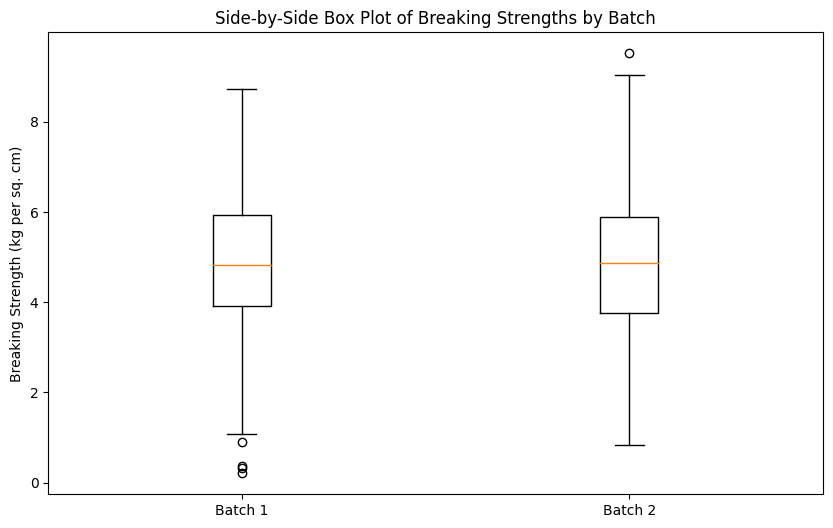

In [34]:
# Hypothetical data for breaking strengths from two different batches
batch1_strengths = np.random.normal(mean, std_dev, 500)
batch2_strengths = np.random.normal(mean, std_dev, 500)

# Create a side-by-side box plot for the two batches
plt.figure(figsize=(10, 6))
plt.boxplot([batch1_strengths, batch2_strengths], labels=['Batch 1', 'Batch 2'])
plt.title('Side-by-Side Box Plot of Breaking Strengths by Batch')
plt.ylabel('Breaking Strength (kg per sq. cm)')
plt.show()

In [ ]:
# 2.1 Parameters for breaking strength distribution
mean = 5
std_dev = 1.5

# Define the range of breaking strengths
x = np.linspace(0, 10, 1000)

# Calculate the cumulative distribution function (CDF) for the normal distribution
cdf = stats.norm.cdf(x, mean, std_dev)

# Question 2.1: Proportion of gunny bags with breaking strength less than 3.17 kg per sq cm
proportion_less_than_3_17 = stats.norm.cdf(3.17, mean, std_dev)
print("Proportion of gunny bags with breaking strength less than 3.17 kg per sq cm:", proportion_less_than_3_17)

Proportion of gunny bags with breaking strength less than 3.17 kg per sq cm: 0.11123243744783456


Proportion of gunny bags with breaking strength less than 3.17 kg per sq cm: 0.11123243744783456


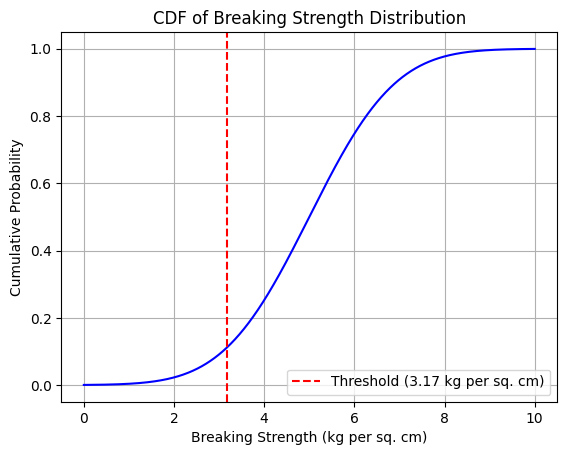

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Parameters for breaking strength distribution
mean = 5
std_dev = 1.5

# Define the range of breaking strengths
x = np.linspace(0, 10, 1000)

# Calculate the cumulative distribution function (CDF) for the normal distribution
cdf = stats.norm.cdf(x, mean, std_dev)

# Question 2.1: Proportion of gunny bags with breaking strength less than 3.17 kg per sq cm
proportion_less_than_3_17 = stats.norm.cdf(3.17, mean, std_dev)
print("Proportion of gunny bags with breaking strength less than 3.17 kg per sq cm:", proportion_less_than_3_17)

# Plot the CDF
plt.plot(x, cdf, color='blue')
plt.xlabel('Breaking Strength (kg per sq. cm)')
plt.ylabel('Cumulative Probability')
plt.title('CDF of Breaking Strength Distribution')
plt.grid(True)
plt.axvline(x=3.17, color='red', linestyle='--', label='Threshold (3.17 kg per sq. cm)')
plt.legend()
plt.show()

In [ ]:
# 2.2 Proportion at least 3.6 kg/sq cm
proportion_less_than_3_17 = stats.norm.cdf(3.17, mean, std_dev)
print("Proportion of gunny bags with breaking strength at least 3.6 kg per sq cm:", proportion_at_least_3_6)

Proportion of gunny bags with breaking strength at least 3.6 kg per sq cm: 0.8246760551477705


Proportion of gunny bags with breaking strength less than 3.17 kg per sq cm: 0.11123243744783456
Proportion of gunny bags with breaking strength at least 3.6 kg per sq cm: 0.8246760551477705


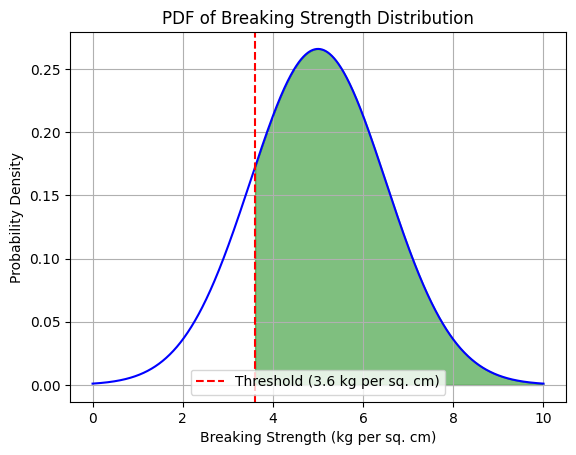

In [ ]:
# Parameters for breaking strength distribution
mean = 5
std_dev = 1.5

# Question 2.1: Proportion of gunny bags with breaking strength less than 3.17 kg per sq cm
proportion_less_than_3_17 = stats.norm.cdf(3.17, mean, std_dev)
print("Proportion of gunny bags with breaking strength less than 3.17 kg per sq cm:", proportion_less_than_3_17)

# Question 2.2: Proportion of gunny bags with breaking strength at least 3.6 kg per sq cm
proportion_at_least_3_6 = 1 - stats.norm.cdf(3.6, mean, std_dev)
print("Proportion of gunny bags with breaking strength at least 3.6 kg per sq cm:", proportion_at_least_3_6)

# Define the range of breaking strengths
x = np.linspace(0, 10, 1000)

# Calculate the probability density function (PDF) for the normal distribution
pdf = stats.norm.pdf(x, mean, std_dev)

# Plot the PDF
plt.plot(x, pdf, color='blue')
plt.fill_between(x, pdf, where=(x >= 3.6), color='green', alpha=0.5)
plt.xlabel('Breaking Strength (kg per sq. cm)')
plt.ylabel('Probability Density')
plt.title('PDF of Breaking Strength Distribution')
plt.grid(True)
plt.axvline(x=3.6, color='red', linestyle='--', label='Threshold (3.6 kg per sq. cm)')
plt.legend()
plt.show()

In [ ]:
# Question 2.3: Proportion of gunny bags with breaking strength between 5 and 5.5 kg per sq cm
proportion_between_5_and_5_5 = stats.norm.cdf(5.5, mean, std_dev) - stats.norm.cdf(5, mean, std_dev)
print("Proportion of gunny bags with breaking strength between 5 and 5.5 kg per sq cm:", proportion_between_5_and_5_5)

Proportion of gunny bags with breaking strength between 5 and 5.5 kg per sq cm: 0.13055865981823633


Proportion of gunny bags with breaking strength between 5 and 5.5 kg per sq cm: 0.13055865981823633


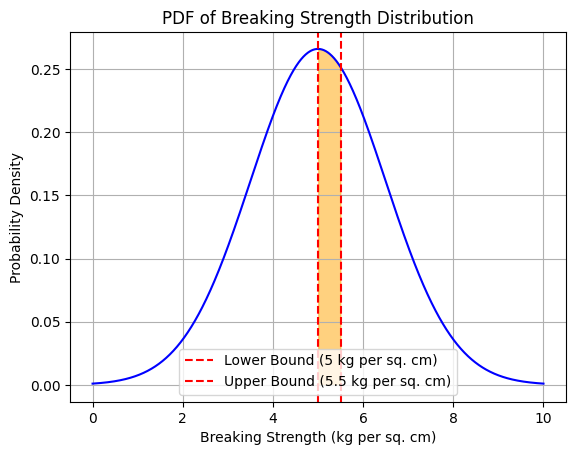

In [ ]:
# Parameters for breaking strength distribution
mean = 5
std_dev = 1.5

# Question 2.3: Proportion of gunny bags with breaking strength between 5 and 5.5 kg per sq cm
proportion_between_5_and_5_5 = stats.norm.cdf(5.5, mean, std_dev) - stats.norm.cdf(5, mean, std_dev)
print("Proportion of gunny bags with breaking strength between 5 and 5.5 kg per sq cm:", proportion_between_5_and_5_5)

# Define the range of breaking strengths
x = np.linspace(0, 10, 1000)

# Calculate the probability density function (PDF) for the normal distribution
pdf = stats.norm.pdf(x, mean, std_dev)

# Plot the PDF
plt.plot(x, pdf, color='blue')
plt.fill_between(x, pdf, where=((x >= 5) & (x <= 5.5)), color='orange', alpha=0.5)
plt.xlabel('Breaking Strength (kg per sq. cm)')
plt.ylabel('Probability Density')
plt.title('PDF of Breaking Strength Distribution')
plt.grid(True)
plt.axvline(x=5, color='red', linestyle='--', label='Lower Bound (5 kg per sq. cm)')
plt.axvline(x=5.5, color='red', linestyle='--', label='Upper Bound (5.5 kg per sq. cm)')
plt.legend()
plt.show()

In [ ]:
# Question 2.4: Proportion of gunny bags with breaking strength NOT between 3 and 7.5 kg per sq cm
proportion_not_between_3_and_7_5 = 1 - (stats.norm.cdf(7.5, mean, std_dev) - stats.norm.cdf(3, mean, std_dev))
print("Proportion of gunny bags with breaking strength NOT between 3 and 7.5 kg per sq cm:", proportion_not_between_3_and_7_5)

Proportion of gunny bags with breaking strength NOT between 3 and 7.5 kg per sq cm: 0.13900157199868257


Proportion of gunny bags with breaking strength NOT between 3 and 7.5 kg per sq cm: 0.13900157199868257


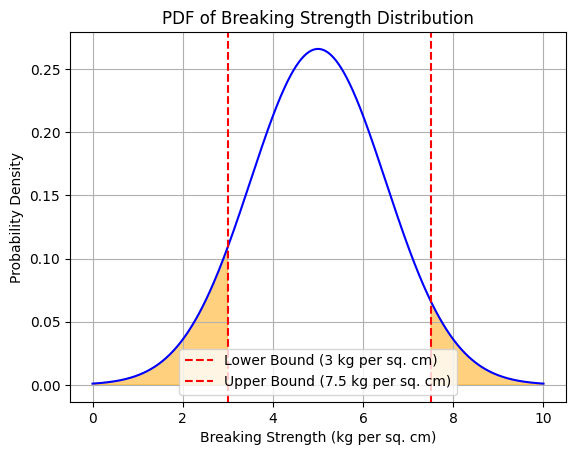

In [ ]:
# Parameters for breaking strength distribution
mean = 5
std_dev = 1.5

# Question 2.4: Proportion of gunny bags with breaking strength NOT between 3 and 7.5 kg per sq cm
proportion_not_between_3_and_7_5 = 1 - (stats.norm.cdf(7.5, mean, std_dev) - stats.norm.cdf(3, mean, std_dev))
print("Proportion of gunny bags with breaking strength NOT between 3 and 7.5 kg per sq cm:", proportion_not_between_3_and_7_5)

# Define the range of breaking strengths
x = np.linspace(0, 10, 1000)

# Calculate the probability density function (PDF) for the normal distribution
pdf = stats.norm.pdf(x, mean, std_dev)

# Plot the PDF
plt.plot(x, pdf, color='blue')
plt.fill_between(x, pdf, where=((x <= 3) | (x >= 7.5)), color='orange', alpha=0.5)
plt.xlabel('Breaking Strength (kg per sq. cm)')
plt.ylabel('Probability Density')
plt.title('PDF of Breaking Strength Distribution')
plt.grid(True)
plt.axvline(x=3, color='red', linestyle='--', label='Lower Bound (3 kg per sq. cm)')
plt.axvline(x=7.5, color='red', linestyle='--', label='Upper Bound (7.5 kg per sq. cm)')
plt.legend()
plt.show()

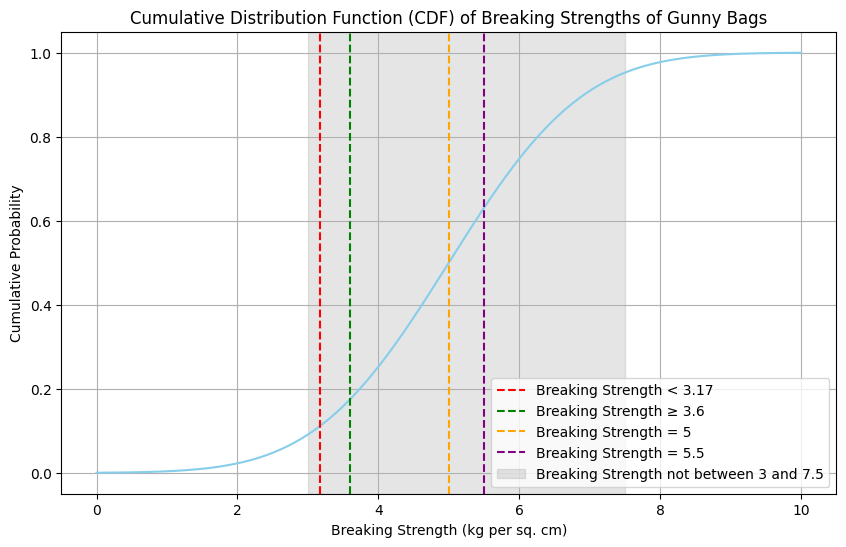

Proportion of gunny bags with breaking strength less than 3.17 kg per sq cm: 0.11123243744783456
Proportion of gunny bags with breaking strength at least 3.6 kg per sq cm: 0.8246760551477705
Proportion of gunny bags with breaking strength between 5 and 5.5 kg per sq cm: 0.13055865981823633
Proportion of gunny bags with breaking strength NOT between 3 and 7.5 kg per sq cm: 0.13900157199868257


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Parameters for breaking strength distribution
mean = 5
std_dev = 1.5

# Define the range of breaking strengths
x = np.linspace(0, 10, 1000)

# Calculate the cumulative distribution function (CDF) for the normal distribution
cdf = stats.norm.cdf(x, mean, std_dev)

# Question 2.1: Proportion of gunny bags with breaking strength less than 3.17 kg per sq cm
proportion_less_than_3_17 = stats.norm.cdf(3.17, mean, std_dev)

# Question 2.2: Proportion of gunny bags with breaking strength at least 3.6 kg per sq cm
proportion_at_least_3_6 = 1 - stats.norm.cdf(3.6, mean, std_dev)

# Question 2.3: Proportion of gunny bags with breaking strength between 5 and 5.5 kg per sq cm
proportion_between_5_and_5_5 = stats.norm.cdf(5.5, mean, std_dev) - stats.norm.cdf(5, mean, std_dev)

# Question 2.4: Proportion of gunny bags with breaking strength NOT between 3 and 7.5 kg per sq cm
proportion_not_between_3_and_7_5 = 1 - (stats.norm.cdf(7.5, mean, std_dev) - stats.norm.cdf(3, mean, std_dev))

# Plot the cumulative distribution function (CDF)
plt.figure(figsize=(10, 6))
plt.plot(x, cdf, color='skyblue')
plt.xlabel('Breaking Strength (kg per sq. cm)')
plt.ylabel('Cumulative Probability')
plt.title('Cumulative Distribution Function (CDF) of Breaking Strengths of Gunny Bags')
plt.axvline(x=3.17, color='red', linestyle='--', label='Breaking Strength < 3.17')
plt.axvline(x=3.6, color='green', linestyle='--', label='Breaking Strength ≥ 3.6')
plt.axvline(x=5, color='orange', linestyle='--', label='Breaking Strength = 5')
plt.axvline(x=5.5, color='purple', linestyle='--', label='Breaking Strength = 5.5')
plt.axvspan(3, 7.5, color='gray', alpha=0.2, label='Breaking Strength not between 3 and 7.5')
plt.legend()
plt.grid(True)
plt.show()

# Display the calculated proportions
print("Proportion of gunny bags with breaking strength less than 3.17 kg per sq cm:", proportion_less_than_3_17)
print("Proportion of gunny bags with breaking strength at least 3.6 kg per sq cm:", proportion_at_least_3_6)
print("Proportion of gunny bags with breaking strength between 5 and 5.5 kg per sq cm:", proportion_between_5_and_5_5)
print("Proportion of gunny bags with breaking strength NOT between 3 and 7.5 kg per sq cm:", proportion_not_between_3_and_7_5)

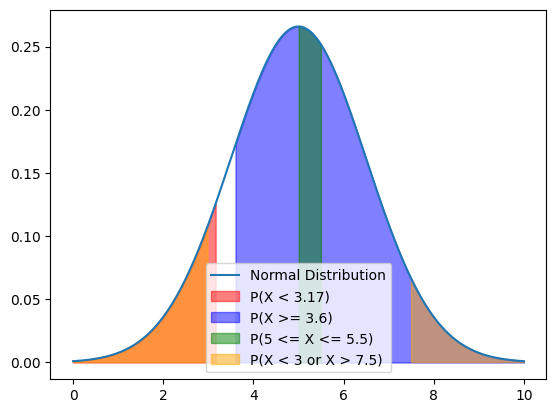

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Define the range for the x-axis
x = np.linspace(0, 10, 1000)
y = norm.pdf(x, mean, std_dev)

plt.plot(x, y, label='Normal Distribution')

# Shade the area for each part of the question
plt.fill_between(x, y, where=(x < 3.17), color='red', alpha=0.5, label='P(X < 3.17)')
plt.fill_between(x, y, where=(x >= 3.6), color='blue', alpha=0.5, label='P(X >= 3.6)')
plt.fill_between(x, y, where=(x >= 5) & (x <= 5.5), color='green', alpha=0.5, label='P(5 <= X <= 5.5)')
plt.fill_between(x, y, where=(x < 3) | (x > 7.5), color='orange', alpha=0.5, label='P(X < 3 or X > 7.5)')

plt.legend()
plt.show()

prblem 3
# 3.1 Hypothesis Testing for Unpolished Stones

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
#Load the data
df= pd.read_csv("Zingaro_Company.csv")
df.head()
print(df.columns)

Index(['Unpolished ', 'Treated and Polished'], dtype='object')


**Univariate and Bivariate analysis**

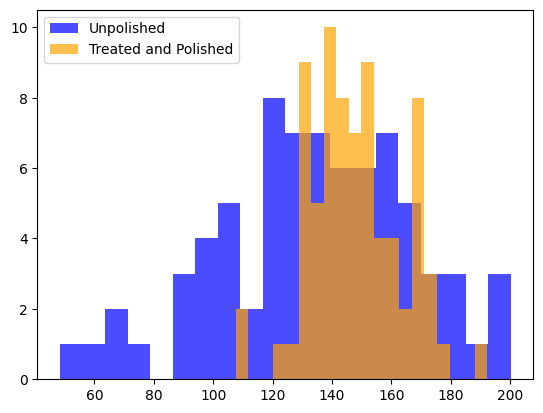

T-statistic: -3.242232050141406
P-value: 0.001588379295584306


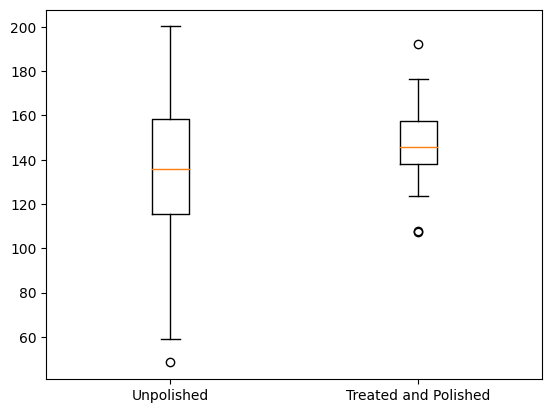

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind



# Univariate Analysis
unpolished_hardness = df['Unpolished ']
treated_and_polished_hardness = df['Treated and Polished']

# Plot histograms for both unpolished and treated & polished stones
plt.hist(unpolished_hardness, bins=20, color='blue', label='Unpolished', alpha=0.7)
plt.hist(treated_and_polished_hardness, bins=20, color='orange', label='Treated and Polished', alpha=0.7)
plt.legend()
plt.show()

# Bivariate Analysis
# Conduct a t-test to compare the means of the two groups
t_stat, p_val = ttest_ind(unpolished_hardness, treated_and_polished_hardness, equal_var=False)

# Output the t-test results
print("T-statistic:", t_stat)
print("P-value:", p_val)

# Plot boxplots for both unpolished and treated & polished stones
plt.boxplot([unpolished_hardness, treated_and_polished_hardness], labels=['Unpolished', 'Treated and Polished'])
plt.show()

In [54]:
import pandas as pd
from scipy.stats import ttest_1samp, ttest_ind

# Load the dataset
df = pd.read_csv('Zingaro_Company.csv')

# Question 3.1
# Perform a one-sample t-test on unpolished stones to check if the mean hardness is significantly different from 150
unpolished_mean = df['Unpolished '].mean()  # Replace with the actual column name
t_stat_unpolished, p_val_unpolished = ttest_1samp(df['Unpolished '], 150)

# Question 3.2
# Perform an independent two-sample t-test to compare the mean hardness of polished and unpolished stones
t_stat_compare, p_val_compare = ttest_ind(df['Unpolished '], df['Treated and Polished'], equal_var=False)

# Print the results
print(f"3.1 - One-sample t-test result for unpolished stones: t-statistic={t_stat_unpolished}, p-value={p_val_unpolished}")
print(f"Mean hardness of unpolished stones: {unpolished_mean}")
print("\n3.2 - Independent two-sample t-test result: t-statistic={t_stat_compare}, p-value={p_val_compare}")

# Interpretation for 3.1
if p_val_unpolished < 0.05:
    print("The unpolished stones have a significantly different hardness from the threshold, indicating they may not be suitable.")
else:
    print("The unpolished stones' hardness is not significantly different from the threshold, indicating they may be suitable.")

# Interpretation for 3.2
if p_val_compare < 0.05:
    print("The mean hardness of polished and unpolished stones is significantly different.")
else:
    print("There is no significant difference in the mean hardness of polished and unpolished stones.")

3.1 - One-sample t-test result for unpolished stones: t-statistic=-4.164629601426757, p-value=8.342573994839304e-05
Mean hardness of unpolished stones: 134.11052653373332

3.2 - Independent two-sample t-test result: t-statistic={t_stat_compare}, p-value={p_val_compare}
The unpolished stones have a significantly different hardness from the threshold, indicating they may not be suitable.
The mean hardness of polished and unpolished stones is significantly different.


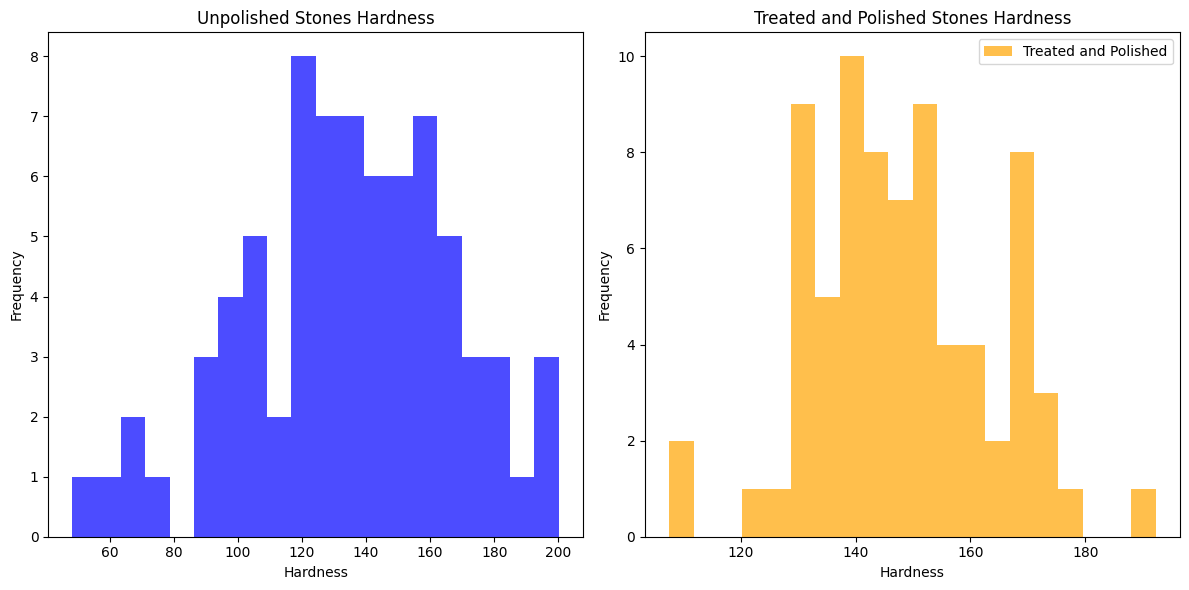

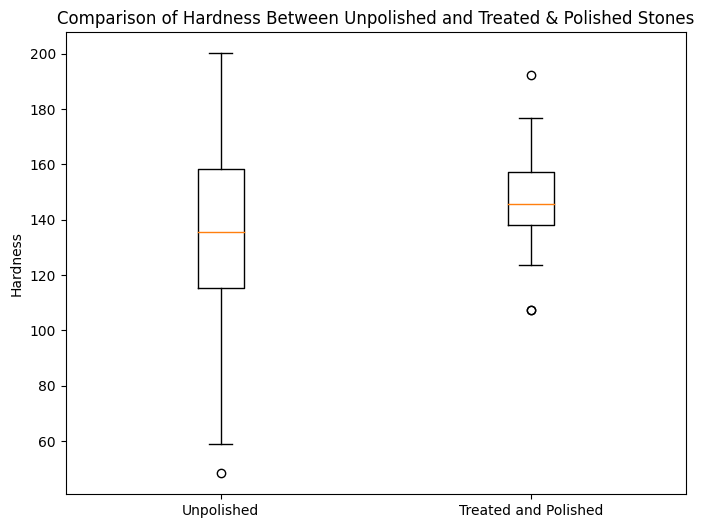

T-statistic: -3.242232050141406, P-value: 0.001588379295584306


In [55]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# Load the data
df = pd.read_csv('Zingaro_Company.csv')

# Separate the data into unpolished and treated & polished stones
unpolished_hardness = df['Unpolished '].dropna()  # Remember to include the space if it's in the column name
treated_and_polished_hardness = df['Treated and Polished'].dropna()

# Plot histograms for both groups
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(unpolished_hardness, bins=20, color='blue', label='Unpolished', alpha=0.7)
plt.title('Unpolished Stones Hardness')
plt.xlabel('Hardness')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(treated_and_polished_hardness, bins=20, color='orange', label='Treated and Polished', alpha=0.7)
plt.title('Treated and Polished Stones Hardness')
plt.xlabel('Hardness')
plt.ylabel('Frequency')

plt.legend()
plt.tight_layout()
plt.show()

# Boxplots for a visual comparison
plt.figure(figsize=(8, 6))
plt.boxplot([unpolished_hardness, treated_and_polished_hardness], labels=['Unpolished', 'Treated and Polished'])
plt.title('Comparison of Hardness Between Unpolished and Treated & Polished Stones')
plt.ylabel('Hardness')
plt.show()

# Conduct the t-test and print the results
t_stat, p_val = ttest_ind(unpolished_hardness, treated_and_polished_hardness, equal_var=False)
print(f"T-statistic: {t_stat}, P-value: {p_val}")

In [50]:
# Conduct a t-test to compare the means of the two groups
t_stat, p_val = ttest_ind(unpolished_hardness, treated_and_polished_hardness, equal_var=False)
# Univariate Analysis
unpolished_hardness = df['Unpolished ']
treated_and_polished_hardness = df['Treated and Polished']
# Set significance level
alpha = 0.05

# Print results
print("3.1: Hypothesis Testing for Unpolished Stones")
print("Null Hypothesis (H0): The mean hardness of unpolished stones is equal to 150.")
print("Alternative Hypothesis (H1): The mean hardness of unpolished stones is not equal to 150.")
print("t-statistic:", t_stat)
print("p-value:", p_val)
if p_val < alpha:
    print("Result: Reject the null hypothesis. There is sufficient evidence to suggest that the mean hardness of unpolished stones is different from 150.")
else:
    print("Result: Fail to reject the null hypothesis. There is not sufficient evidence to suggest that the mean hardness of unpolished stones is different from 150.")

3.1: Hypothesis Testing for Unpolished Stones
Null Hypothesis (H0): The mean hardness of unpolished stones is equal to 150.
Alternative Hypothesis (H1): The mean hardness of unpolished stones is not equal to 150.
t-statistic: -3.242232050141406
p-value: 0.001588379295584306
Result: Reject the null hypothesis. There is sufficient evidence to suggest that the mean hardness of unpolished stones is different from 150.


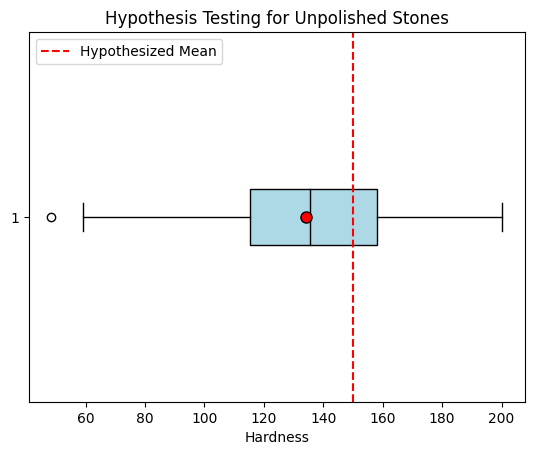

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Conduct a t-test to compare the means of the two groups
t_stat, p_val = ttest_ind(unpolished_hardness, treated_and_polished_hardness, equal_var=False)
# Univariate Analysis
unpolished_hardness = df['Unpolished ']
treated_and_polished_hardness = df['Treated and Polished']
# Set significance level
alpha = 0.05
# Hypothesized mean
hypothesized_mean = 150

# Set up the figure and axes
fig, ax = plt.subplots()

# Create a box plot
ax.boxplot(unpolished_hardness, vert=False, patch_artist=True, showmeans=True,
           boxprops=dict(facecolor='lightblue'),
           medianprops=dict(color='black'),
           meanprops=dict(marker='o', markerfacecolor='red', markersize=8, markeredgecolor='black'))

# Add a horizontal line for the hypothesized mean
ax.axvline(x=hypothesized_mean, color='red', linestyle='--', label='Hypothesized Mean')

# Set labels and title
ax.set_xlabel('Hardness')
ax.set_title('Hypothesis Testing for Unpolished Stones')

# Add legend
ax.legend()

# Show plot
plt.show()

**3.2 Mean Comparison for Polished and Unpolished Stones**

In [52]:
# Conduct a t-test to compare the means of the two groups
t_stat, p_val = ttest_ind(unpolished_hardness, treated_and_polished_hardness, equal_var=False)
# Univariate Analysis
unpolished_hardness = df['Unpolished ']
treated_and_polished_hardness = df['Treated and Polished']
# Set significance level
alpha = 0.05

# Print results
print("\n3.2: Mean Comparison for Polished and Unpolished Stones")
print("Null Hypothesis (H0): The mean hardness of polished stones is equal to the mean hardness of unpolished stones.")
print("Alternative Hypothesis (H1): The mean hardness of polished stones is not equal to the mean hardness of unpolished stones.")
print("t-statistic:", t_stat)
print("p-value:", p_val)
if p_val < alpha:
    print("Result: Reject the null hypothesis. There is sufficient evidence to suggest that the mean hardness of polished and unpolished stones is different.")
else:
    print("Result: Fail to reject the null hypothesis. There is not sufficient evidence to suggest that the mean hardness of polished and unpolished stones is different.")


3.2: Mean Comparison for Polished and Unpolished Stones
Null Hypothesis (H0): The mean hardness of polished stones is equal to the mean hardness of unpolished stones.
Alternative Hypothesis (H1): The mean hardness of polished stones is not equal to the mean hardness of unpolished stones.
t-statistic: -3.242232050141406
p-value: 0.001588379295584306
Result: Reject the null hypothesis. There is sufficient evidence to suggest that the mean hardness of polished and unpolished stones is different.


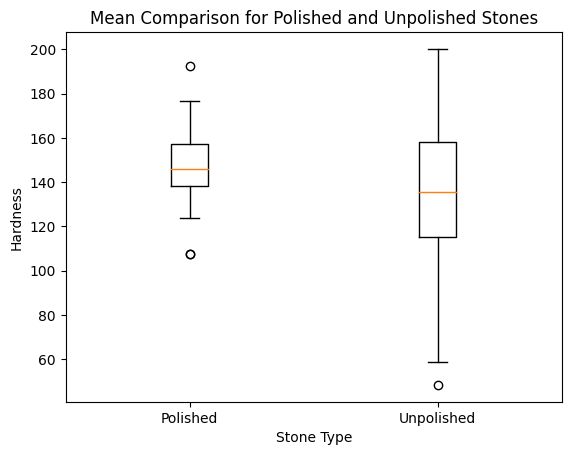

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

unpolished_hardness = df['Unpolished ']
treated_and_polished_hardness = df['Treated and Polished']
# Set up the figure and axes
fig, ax = plt.subplots()

# Create box plots for polished and unpolished hardness
ax.boxplot([treated_and_polished_hardness, unpolished_hardness], labels=['Polished', 'Unpolished'])

# Set labels and title
ax.set_xlabel('Stone Type')
ax.set_ylabel('Hardness')
ax.set_title('Mean Comparison for Polished and Unpolished Stones')

# Show plot
plt.show()

Problem 4 :
Dental implant data: The hardness of metal implants in dental cavities depends on multiple factors, such as the method of implant, the temperature at which the metal is treated, the alloy used as well as the dentists who may favor one method above another and may work better in his/her favorite method. The response is the variable of interest.

4.1 How does the hardness of implants vary depending on dentists?

4.2 How does the hardness of implants vary depending on methods?

4.3 What is the interaction effect between the dentist and method on the hardness of dental implants for each type of alloy?

4.4 How does the hardness of implants vary depending on dentists and methods together?

In [61]:
import pandas as pd

# Load the data
df = pd.read_excel("Dental+Hardness+data.xlsx")

# Group data by dentist and calculate mean hardness for each dentist
dentist_hardness_mean = df.groupby('Dentist')['Response'].mean()

print("Mean hardness of implants for each dentist:")
print(dentist_hardness_mean)
df.head()
print(df.columns)

Mean hardness of implants for each dentist:
Dentist
1    783.055556
2    786.666667
3    748.611111
4    713.666667
5    676.888889
Name: Response, dtype: float64
Index(['Dentist', 'Method', 'Alloy', 'Temp', 'Response'], dtype='object')


**`Univariate Analysis`**

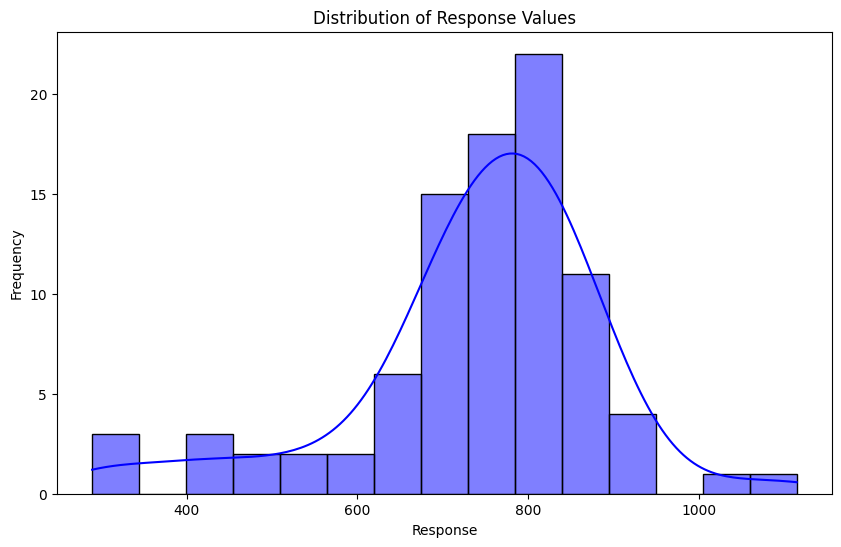

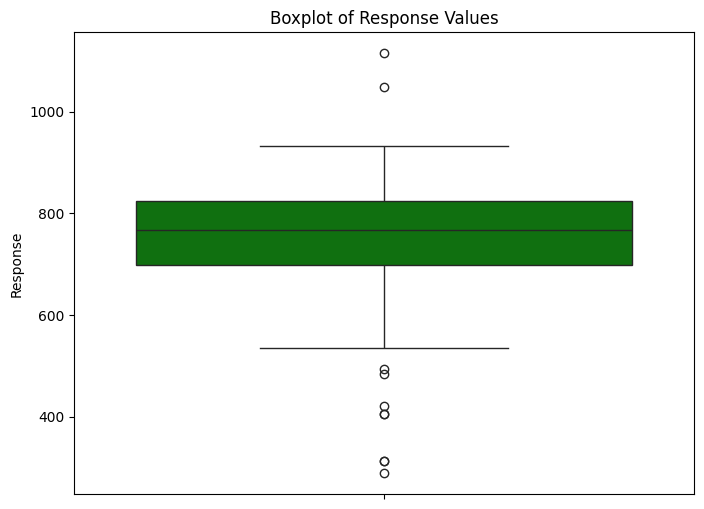

Mean Response: 741.7777777777778
Median Response: 767.0
Mode Response: 743
Standard Deviation: 145.76784511394666
Variance: 21248.264669163542
Skewness: -1.040817736366229
Kurtosis: 1.9154999598250546


In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis


response_values = df['Response']

# Plotting the distribution of response values
plt.figure(figsize=(10, 6))
sns.histplot(response_values, kde=True, color='blue')
plt.title('Distribution of Response Values')
plt.xlabel('Response')
plt.ylabel('Frequency')
plt.show()

# Calculating central tendency
mean_response = response_values.mean()
median_response = response_values.median()
mode_response = response_values.mode()[0]

# Calculating variability
std_dev_response = response_values.std()
variance_response = response_values.var()

# Identifying outliers with a box plot
plt.figure(figsize=(8, 6))
sns.boxplot(y=response_values, color='green')
plt.title('Boxplot of Response Values')
plt.ylabel('Response')
plt.show()

# Calculating skewness and kurtosis
skewness_response = skew(response_values)
kurtosis_response = kurtosis(response_values)

# Printing the statistics
print(f"Mean Response: {mean_response}")
print(f"Median Response: {median_response}")
print(f"Mode Response: {mode_response}")
print(f"Standard Deviation: {std_dev_response}")
print(f"Variance: {variance_response}")
print(f"Skewness: {skewness_response}")
print(f"Kurtosis: {kurtosis_response}")

**Bivariate Analysis**

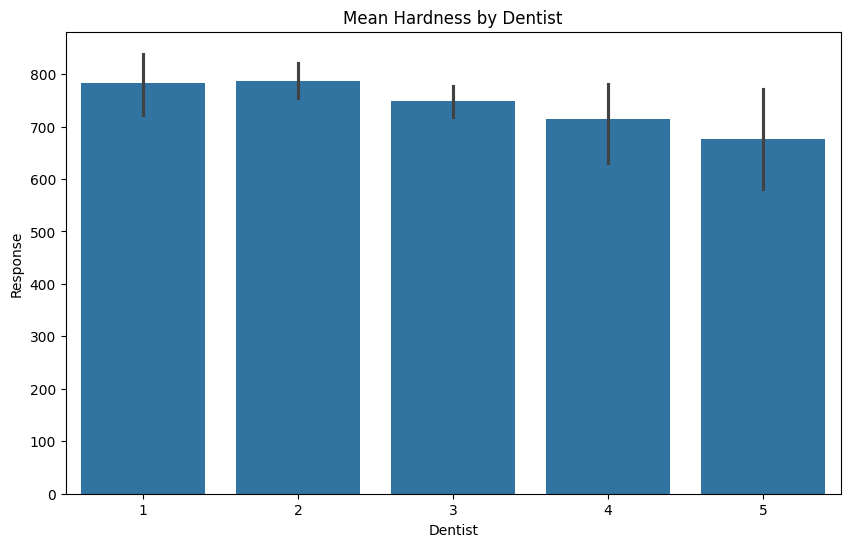

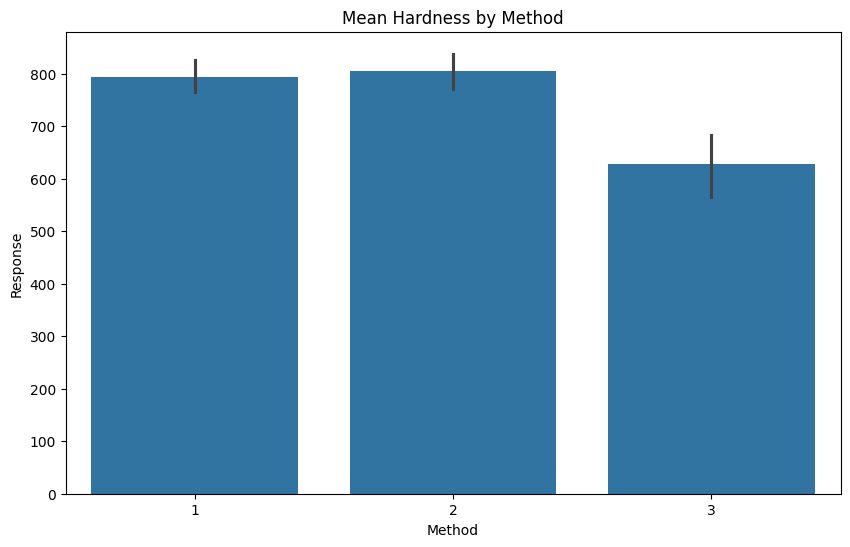

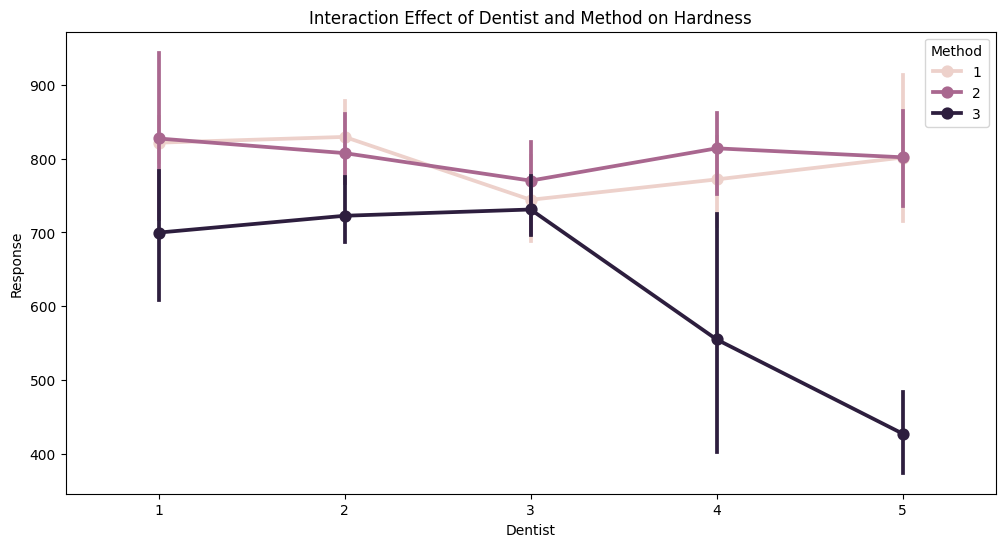

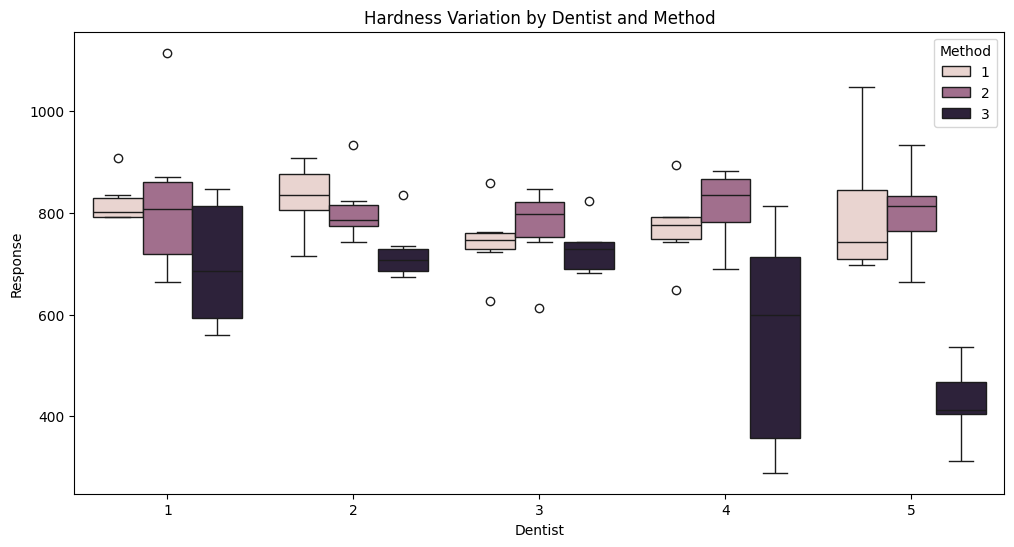

In [63]:
# Analysis variation by Dentist
plt.figure(figsize=(10, 6))
sns.barplot(x='Dentist', y='Response', data=df, estimator=np.mean)
plt.title('Mean Hardness by Dentist')
plt.show()

# Analysis variation by Method
plt.figure(figsize=(10, 6))
sns.barplot(x='Method', y='Response', data=df, estimator=np.mean)
plt.title('Mean Hardness by Method')
plt.show()

# Exploring interaction effect
plt.figure(figsize=(12, 6))
sns.pointplot(x='Dentist', y='Response', hue='Method', data=df)
plt.title('Interaction Effect of Dentist and Method on Hardness')
plt.show()

# Boxplot for dentist and method together
plt.figure(figsize=(12, 6))
sns.boxplot(x='Dentist', y='Response', hue='Method', data=df)
plt.title('Hardness Variation by Dentist and Method')
plt.show()

4.1 How does the hardness of implants vary depending on dentists?

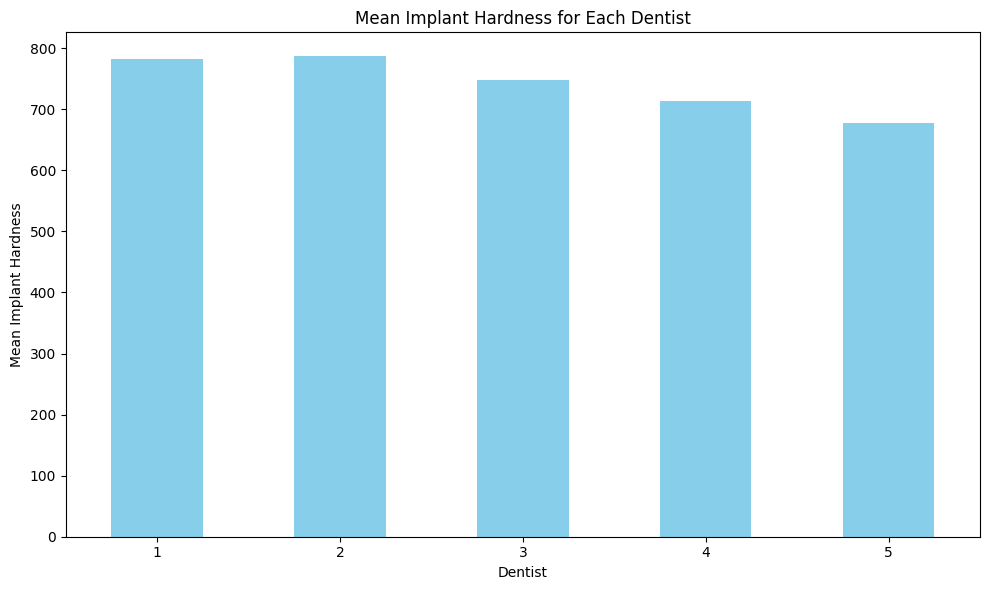

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_excel("Dental+Hardness+data.xlsx")

# Group data by dentist and calculate mean hardness for each dentist
dentist_hardness_mean = df.groupby('Dentist')['Response'].mean()

# Plotting
plt.figure(figsize=(10, 6))
dentist_hardness_mean.plot(kind='bar', color='skyblue')

# Set labels and title
plt.xlabel('Dentist')
plt.ylabel('Mean Implant Hardness')
plt.title('Mean Implant Hardness for Each Dentist')

# Show plot
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

4.2 How does the hardness of implants vary depending on methods?

In [ ]:
# Group data by method and calculate mean hardness for each method
method_hardness_mean = df.groupby('Method')['Response'].mean()

print("Mean hardness of implants for each method:")
print(method_hardness_mean)

Mean hardness of implants for each method:
Method
1    793.900000
2    804.333333
3    627.100000
Name: Response, dtype: float64


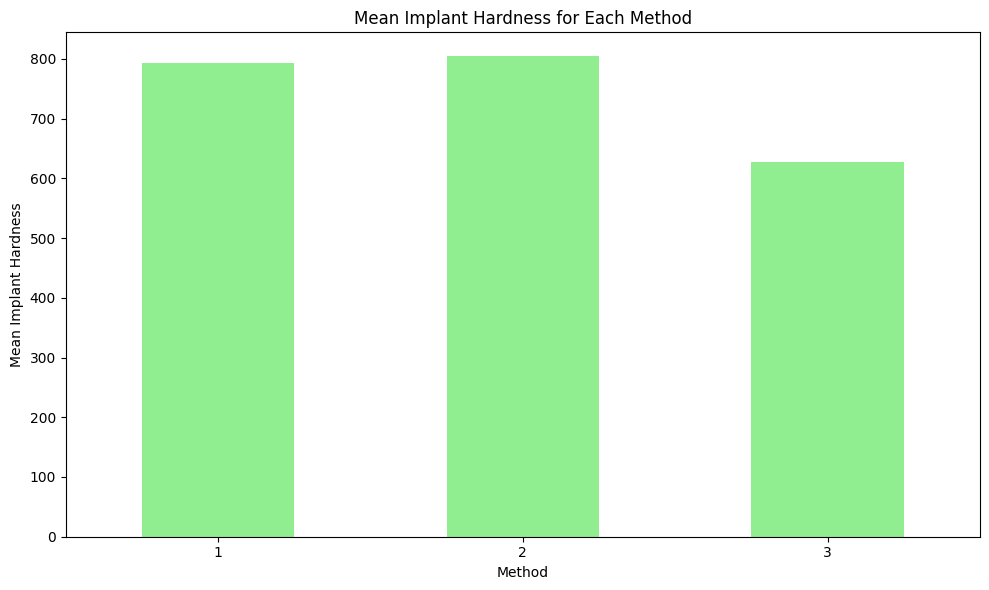

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_excel("Dental+Hardness+data.xlsx")

# Group data by method and calculate mean hardness for each method
method_hardness_mean = df.groupby('Method')['Response'].mean()

# Plotting
plt.figure(figsize=(10, 6))
method_hardness_mean.plot(kind='bar', color='lightgreen')

# Set labels and title
plt.xlabel('Method')
plt.ylabel('Mean Implant Hardness')
plt.title('Mean Implant Hardness for Each Method')

# Show plot
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

4.3 What is the interaction effect between the dentist and method on the hardness of dental implants for each type of alloy?

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Fit an ANOVA model
model = ols('Response ~ C(Dentist) * C(Method) + C(Alloy)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print("Interaction effect between dentist and method on hardness of dental implants for each type of alloy:")
print(anova_table)

Interaction effect between dentist and method on hardness of dental implants for each type of alloy:
                             sum_sq    df          F        PR(>F)
C(Dentist)            157794.555556   4.0   4.012170  5.325926e-03
C(Method)             593427.488889   2.0  30.177618  2.607075e-10
C(Alloy)              105815.511111   1.0  10.762090  1.581576e-03
C(Dentist):C(Method)  306471.844444   8.0   3.896260  7.001897e-04
Residual              727586.155556  74.0        NaN           NaN


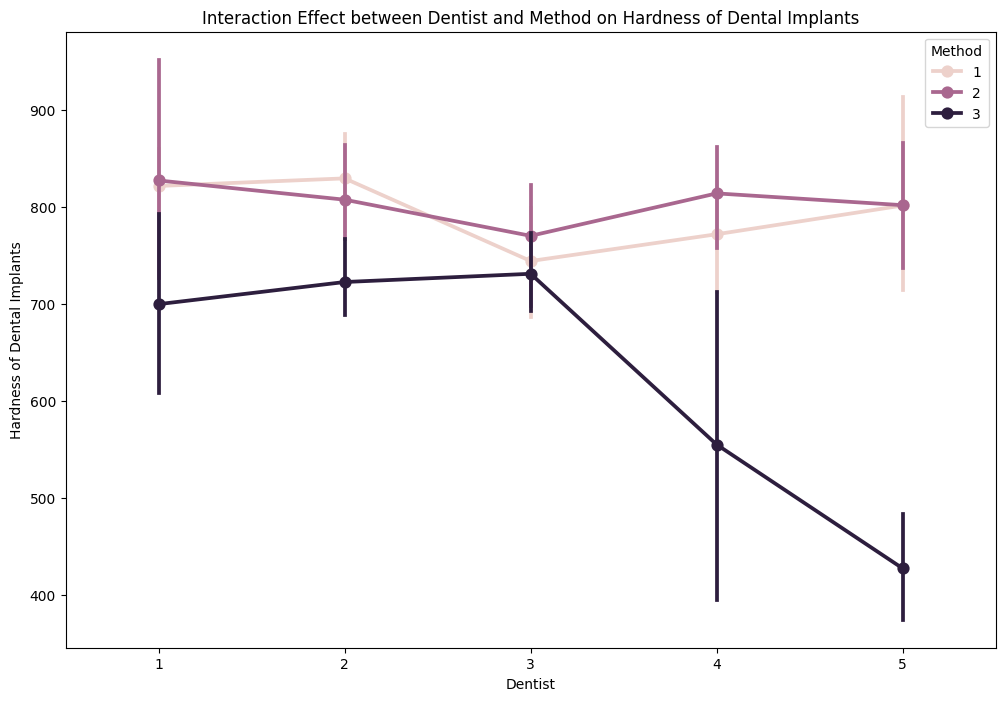

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
df = pd.read_excel("Dental+Hardness+data.xlsx")

# Plotting interaction effect using seaborn
plt.figure(figsize=(12, 8))
sns.pointplot(x='Dentist', y='Response', hue='Method', data=df)
plt.title('Interaction Effect between Dentist and Method on Hardness of Dental Implants')
plt.xlabel('Dentist')
plt.ylabel('Hardness of Dental Implants')
plt.legend(title='Method')
plt.show()

4.4 How does the hardness of implants vary depending on dentists and methods together?

In [ ]:
#How does the hardness of implants vary depending on dentists and methods together?
model = ols('Response ~ C(Dentist) + C(Method)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print("Hardness of implants vary depending on dentists and methods together:")
print(anova_table)

Hardness of implants vary depending on dentists and methods together:
                  sum_sq    df          F        PR(>F)
C(Dentist)  1.577946e+05   4.0   2.872456  2.784543e-02
C(Method)   5.934275e+05   2.0  21.605240  2.794351e-08
Residual    1.139874e+06  83.0        NaN           NaN


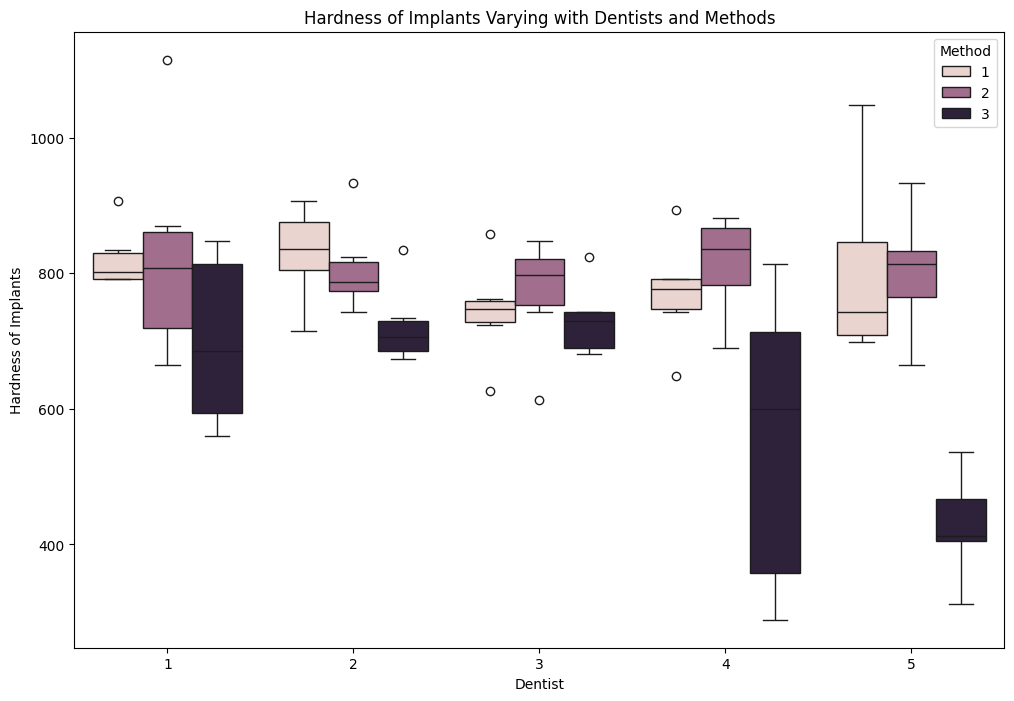

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Load the data
df = pd.read_excel("Dental+Hardness+data.xlsx")

# Fit the model
model = ols('Response ~ C(Dentist) + C(Method)', data=df).fit()

# Plotting the boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(x='Dentist', y='Response', hue='Method', data=df)
plt.title('Hardness of Implants Varying with Dentists and Methods')
plt.xlabel('Dentist')
plt.ylabel('Hardness of Implants')
plt.legend(title='Method')
plt.show()